<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedHyperParameterOptimisation/blob/BayesianOptimization/ScikitOptimize_SearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_boston

In [3]:
dataset = load_boston()
data = dataset.data
columns = dataset.feature_names
target = dataset.target
df = pd.DataFrame(data = data,columns = columns)
df['target'] = target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


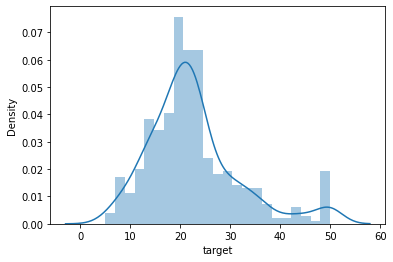

In [5]:
sns.distplot(df['target'])
plt.show()

In [6]:
X = df.drop('target', axis = 1)
y = df['target']

In [7]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

Lets initiate the algorith object

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

In [12]:
gbr = GradientBoostingRegressor(random_state = 100)

lets define the parameters grid

In [15]:
params_grid = {
    'n_estimators' : [20,120],
    'min_samples_split' :[0.001,0.009,'log-uniform'],
    'max_depth':[1,8],
    'loss':['ls','lad','huber']}

create the BayesSearchCV Object

In [17]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.5 MB/s 


In [18]:
from skopt import BayesSearchCV

In [21]:
search = BayesSearchCV(estimator = gbr,
                       search_spaces = params_grid,
                       scoring = 'neg_mean_squared_error',
                       n_iter = 50,
                       cv = 5,
                       verbose = 1,
                       n_jobs = -1,
                       random_state = 100)

lets fit the search object

In [22]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=100),
              n_jobs=-1, random_state=100, scoring='neg_mean_squared_error',
              search_spaces={'loss': ['ls', 'lad', 'huber'],
                             'max_depth': [1, 8],
                             'min_samples_split': [0.001, 0.009, 'log-uniform'],
                             'n_estimators': [20, 120]},
              verbose=1)

Lets Explore the search object

In [23]:
search.best_params_

OrderedDict([('loss', 'ls'),
             ('max_depth', 3),
             ('min_samples_split', 0.0015883733533062906),
             ('n_estimators', 120)])

In [28]:
best_estimator = search.best_estimator_
best_estimator

GradientBoostingRegressor(loss='ls', min_samples_split=0.0015883733533062906,
                          n_estimators=120, random_state=100)

In [26]:
search.best_score_

-10.570813249347438

Evaluate the model

In [27]:
from sklearn.metrics import mean_squared_error

In [32]:
print('error in train : ',mean_squared_error(y_train, best_estimator.predict(X_train)))
print('error in test : ',mean_squared_error(y_test, best_estimator.predict(X_test)))

error in train :  1.1716967854335043
error in test :  17.045828395109538


Lets explore the search results

In [43]:
res = pd.DataFrame(search.cv_results_)
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.337335,0.086577,0.018474,0.010745,lad,2,0.002382,33,"{'loss': 'lad', 'max_depth': 2, 'min_samples_s...",-14.493010,-19.802632,-8.437010,-14.384091,-20.529158,-15.529180,4.380546,49
1,1.253981,0.194415,0.008446,0.007877,lad,4,0.005075,99,"{'loss': 'lad', 'max_depth': 4, 'min_samples_s...",-13.538192,-14.038527,-5.971926,-7.196388,-18.150886,-11.779184,4.550244,45
2,1.223072,0.154138,0.004541,0.002112,lad,5,0.005452,90,"{'loss': 'lad', 'max_depth': 5, 'min_samples_s...",-11.738898,-15.093140,-5.585612,-6.850747,-17.362771,-11.326234,4.555971,43
3,0.069795,0.032455,0.002690,0.000381,ls,3,0.003455,35,"{'loss': 'ls', 'max_depth': 3, 'min_samples_sp...",-8.569913,-12.640445,-6.690543,-11.712050,-20.509238,-12.024438,4.750854,46
4,0.416957,0.062790,0.002818,0.000412,lad,6,0.00147,36,"{'loss': 'lad', 'max_depth': 6, 'min_samples_s...",-12.352143,-15.410871,-5.870388,-8.367049,-18.583954,-12.116881,4.600188,47


In [44]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_fit_time            50 non-null     float64
 1   std_fit_time             50 non-null     float64
 2   mean_score_time          50 non-null     float64
 3   std_score_time           50 non-null     float64
 4   param_loss               50 non-null     object 
 5   param_max_depth          50 non-null     object 
 6   param_min_samples_split  50 non-null     object 
 7   param_n_estimators       50 non-null     object 
 8   params                   50 non-null     object 
 9   split0_test_score        50 non-null     float64
 10  split1_test_score        50 non-null     float64
 11  split2_test_score        50 non-null     float64
 12  split3_test_score        50 non-null     float64
 13  split4_test_score        50 non-null     float64
 14  mean_test_score          50 

In [45]:
sel_cols = ['rank_test_score','param_n_estimators','param_min_samples_split','param_max_depth','param_loss','mean_test_score','std_test_score']

In [46]:
res = res[sel_cols].sort_values('rank_test_score').set_index('rank_test_score')
res.head()

,param_n_estimators,param_min_samples_split,param_max_depth,param_loss,mean_test_score,std_test_score
rank_test_score,,,,,,
1,120,0.001537,3,ls,-10.570813,4.565117
1,120,0.001538,3,ls,-10.570813,4.565117
1,120,0.001538,3,ls,-10.570813,4.565117
1,120,0.001539,3,ls,-10.570813,4.565117
1,120,0.001539,3,ls,-10.570813,4.565117


In [54]:
def param_observe(param_name):
  mean = res.groupby([param_name])['mean_test_score'].mean()
  std = res.groupby([param_name])['mean_test_score'].std()
  mean.plot( yerr = [std,std])
  plt.show()

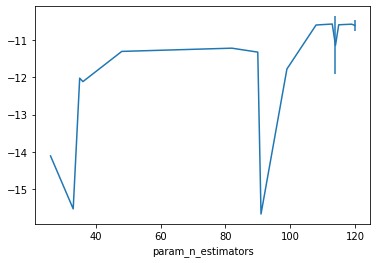

In [55]:
param_observe('param_n_estimators')

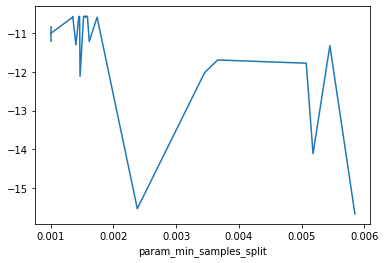

In [56]:
param_observe('param_min_samples_split')

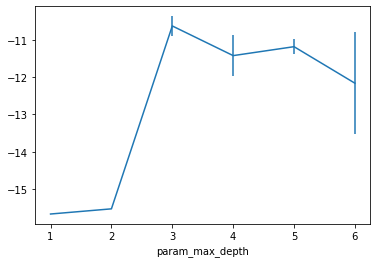

In [57]:
param_observe('param_max_depth')

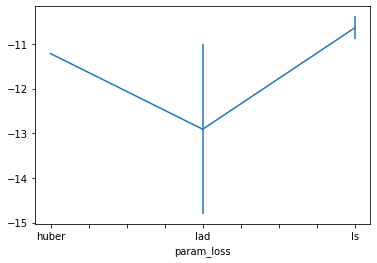

In [58]:
param_observe('param_loss')